# Coding assessment

#Malak Mohammed S. AlQahtani

#MSc in Computing (Data Analytics)

In [1]:
#Importing the libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as mno
from sklearn.preprocessing import LabelEncoder
from glob import glob
from collections import Counter
from scipy import stats as st
from bioinfokit.analys import get_data
import researchpy as rp
import scipy.stats as stats


In [2]:
#To read all MAF files for 50 patients

files=glob('Patient*')

In [3]:
files.sort()
files

['Patient-0.somatic.snvs.maf',
 'Patient-1.somatic.snvs.maf',
 'Patient-10.somatic.snvs.maf',
 'Patient-11.somatic.snvs.maf',
 'Patient-12.somatic.snvs.maf',
 'Patient-13.somatic.snvs.maf',
 'Patient-14.somatic.snvs.maf',
 'Patient-15.somatic.snvs.maf',
 'Patient-16.somatic.snvs.maf',
 'Patient-17.somatic.snvs.maf',
 'Patient-18.somatic.snvs.maf',
 'Patient-19.somatic.snvs.maf',
 'Patient-2.somatic.snvs.maf',
 'Patient-20.somatic.snvs.maf',
 'Patient-21.somatic.snvs.maf',
 'Patient-22.somatic.snvs.maf',
 'Patient-23.somatic.snvs.maf',
 'Patient-24.somatic.snvs.maf',
 'Patient-25.somatic.snvs.maf',
 'Patient-26.somatic.snvs.maf',
 'Patient-27.somatic.snvs.maf',
 'Patient-28.somatic.snvs.maf',
 'Patient-29.somatic.snvs.maf',
 'Patient-3.somatic.snvs.maf',
 'Patient-30.somatic.snvs.maf',
 'Patient-31.somatic.snvs.maf',
 'Patient-32.somatic.snvs.maf',
 'Patient-33.somatic.snvs.maf',
 'Patient-34.somatic.snvs.maf',
 'Patient-35.somatic.snvs.maf',
 'Patient-36.somatic.snvs.maf',
 'Patient-37

In [4]:
#To merge 50 files in one file

data=pd.concat((pd.read_csv(file,sep='\t')for file in files), ignore_index=True)

In [5]:
#To explore the first 1000 records

data.head(1000)

,Hugo_Symbol,Chromosome,Start_position,End_position,Variant_Classification,Variant_Type,Reference_Allele,Tumor_Seq_Allele1,Tumor_Seq_Allele2,Tumor_Sample_Barcode,Matched_Norm_Sample_Barcode,Protein_Change,t_alt_count,t_ref_count
0,AMOT,X,112035152,112035152,Missense_Mutation,SNP,G,G,C,Patient-0-Tumor,Patient-0-Normal,p.Q612E,8,31
1,SEMA6D,15,48062786,48062786,Missense_Mutation,SNP,G,G,A,Patient-0-Tumor,Patient-0-Normal,p.A676T,4,87
2,PRR12,19,50100969,50100969,Missense_Mutation,SNP,C,C,G,Patient-0-Tumor,Patient-0-Normal,p.S1126C,5,25
3,TNR,1,175372529,175372529,Silent,SNP,G,G,A,Patient-0-Tumor,Patient-0-Normal,p.S241S,30,155
4,CPA4,7,129944344,129944344,Silent,SNP,C,C,G,Patient-0-Tumor,Patient-0-Normal,p.A137A,12,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,SERTAD4,1,210415366,210415366,Missense_Mutation,SNP,C,C,G,Patient-11-Tumor,Patient-11-Normal,p.S252C,10,50
996,CPEB3,10,93841256,93841256,Missense_Mutation,SNP,C,C,T,Patient-11-Tumor,Patient-11-Normal,p.E550K,7,46
997,ITM2A,X,78618104,78618104,Silent,SNP,G,G,A,Patient-11-Tumor,Patient-11-Normal,p.L132L,4,88
998,C10orf67,10,23611391,23611391,Missense_Mutation,SNP,C,C,G,Patient-11-Tumor,Patient-11-Normal,p.E136Q,8,126


In [6]:
data.info()
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15673 entries, 0 to 15672
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Hugo_Symbol                  15673 non-null  object
 1   Chromosome                   15673 non-null  object
 2   Start_position               15673 non-null  int64 
 3   End_position                 15673 non-null  int64 
 4   Variant_Classification       15673 non-null  object
 5   Variant_Type                 15673 non-null  object
 6   Reference_Allele             15673 non-null  object
 7   Tumor_Seq_Allele1            15673 non-null  object
 8   Tumor_Seq_Allele2            15673 non-null  object
 9   Tumor_Sample_Barcode         15673 non-null  object
 10  Matched_Norm_Sample_Barcode  15673 non-null  object
 11  Protein_Change               15464 non-null  object
 12  t_alt_count                  15673 non-null  int64 
 13  t_ref_count                  15

,Hugo_Symbol,Chromosome,Start_position,End_position,Variant_Classification,Variant_Type,Reference_Allele,Tumor_Seq_Allele1,Tumor_Seq_Allele2,Tumor_Sample_Barcode,Matched_Norm_Sample_Barcode,Protein_Change,t_alt_count,t_ref_count
0,AMOT,X,112035152,112035152,Missense_Mutation,SNP,G,G,C,Patient-0-Tumor,Patient-0-Normal,p.Q612E,8,31
1,SEMA6D,15,48062786,48062786,Missense_Mutation,SNP,G,G,A,Patient-0-Tumor,Patient-0-Normal,p.A676T,4,87
2,PRR12,19,50100969,50100969,Missense_Mutation,SNP,C,C,G,Patient-0-Tumor,Patient-0-Normal,p.S1126C,5,25
3,TNR,1,175372529,175372529,Silent,SNP,G,G,A,Patient-0-Tumor,Patient-0-Normal,p.S241S,30,155
4,CPA4,7,129944344,129944344,Silent,SNP,C,C,G,Patient-0-Tumor,Patient-0-Normal,p.A137A,12,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15668,DSC2,18,28669497,28669497,Missense_Mutation,SNP,C,C,G,Patient-9-Tumor,Patient-9-Normal,p.D179H,36,41
15669,DLX4,17,48051151,48051151,Silent,SNP,G,G,A,Patient-9-Tumor,Patient-9-Normal,p.G189G,37,37
15670,PPP4R1,18,9588720,9588720,Nonsense_Mutation,SNP,G,G,A,Patient-9-Tumor,Patient-9-Normal,p.Q143*,7,53
15671,KPRP,1,152733085,152733085,Nonsense_Mutation,SNP,C,C,T,Patient-9-Tumor,Patient-9-Normal,p.Q341*,28,57


In [7]:
data.describe()

,Start_position,End_position,t_alt_count,t_ref_count
count,1.567300e+04,1.567300e+04,15673.000000,15673.000000
mean,7.540486e+07,7.540486e+07,19.671792,87.602374
std,5.692734e+07,5.692734e+07,22.306744,85.678126
min,6.575000e+03,6.575000e+03,2.000000,0.000000
25%,3.154073e+07,3.154073e+07,7.000000,34.000000
50%,5.785038e+07,5.785038e+07,13.000000,64.000000
75%,1.136292e+08,1.136292e+08,25.000000,114.000000
max,2.491501e+08,2.491501e+08,503.000000,1383.000000


In [8]:
# 14 columns and 15673 records in all MFA files for 50 patients

data.shape

(15673, 14)

In [9]:
# To find the data type of each column

data.dtypes

Hugo_Symbol                    object
Chromosome                     object
Start_position                  int64
End_position                    int64
Variant_Classification         object
Variant_Type                   object
Reference_Allele               object
Tumor_Seq_Allele1              object
Tumor_Seq_Allele2              object
Tumor_Sample_Barcode           object
Matched_Norm_Sample_Barcode    object
Protein_Change                 object
t_alt_count                     int64
t_ref_count                     int64
dtype: object

In [10]:
#To find the missing values 
data.isnull().sum()

Hugo_Symbol                      0
Chromosome                       0
Start_position                   0
End_position                     0
Variant_Classification           0
Variant_Type                     0
Reference_Allele                 0
Tumor_Seq_Allele1                0
Tumor_Seq_Allele2                0
Tumor_Sample_Barcode             0
Matched_Norm_Sample_Barcode      0
Protein_Change                 209
t_alt_count                      0
t_ref_count                      0
dtype: int64

In [11]:
#To save the file as CSV file
#data.to_csv(r'C:\Users\tmala\Desktop\KAIMRC\data.csv', index = False)

In [12]:
#To drop null values in Protein_Change column
data = data.dropna(how='any',axis=0) 


In [13]:
#To check if still has the missing values in Protein_Change column
data.isnull().sum()

Hugo_Symbol                    0
Chromosome                     0
Start_position                 0
End_position                   0
Variant_Classification         0
Variant_Type                   0
Reference_Allele               0
Tumor_Seq_Allele1              0
Tumor_Seq_Allele2              0
Tumor_Sample_Barcode           0
Matched_Norm_Sample_Barcode    0
Protein_Change                 0
t_alt_count                    0
t_ref_count                    0
dtype: int64

In [14]:
#To analysis all variant classification except the silent classification
data.drop(data[data['Variant_Classification'] == 'Silent'].index, inplace = True)
data.head(100)

C:\Users\tmala\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Hugo_Symbol,Chromosome,Start_position,End_position,Variant_Classification,Variant_Type,Reference_Allele,Tumor_Seq_Allele1,Tumor_Seq_Allele2,Tumor_Sample_Barcode,Matched_Norm_Sample_Barcode,Protein_Change,t_alt_count,t_ref_count
0,AMOT,X,112035152,112035152,Missense_Mutation,SNP,G,G,C,Patient-0-Tumor,Patient-0-Normal,p.Q612E,8,31
1,SEMA6D,15,48062786,48062786,Missense_Mutation,SNP,G,G,A,Patient-0-Tumor,Patient-0-Normal,p.A676T,4,87
2,PRR12,19,50100969,50100969,Missense_Mutation,SNP,C,C,G,Patient-0-Tumor,Patient-0-Normal,p.S1126C,5,25
7,ZNF253,19,20002885,20002885,Missense_Mutation,SNP,G,G,A,Patient-0-Tumor,Patient-0-Normal,p.V277I,6,66
8,MEF2C,5,88025061,88025061,Missense_Mutation,SNP,G,G,A,Patient-0-Tumor,Patient-0-Normal,p.S313L,6,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,ZNF93,19,20045361,20045361,Missense_Mutation,SNP,A,A,G,Patient-0-Tumor,Patient-0-Normal,p.R533G,4,61
143,OR10H5,19,15905340,15905340,Missense_Mutation,SNP,C,C,T,Patient-0-Tumor,Patient-0-Normal,p.S161L,16,98
144,FOXN3,14,89878759,89878759,Missense_Mutation,SNP,C,C,G,Patient-0-Tumor,Patient-0-Normal,p.G21A,14,100
146,NLRP8,19,56467408,56467408,Missense_Mutation,SNP,G,G,A,Patient-0-Tumor,Patient-0-Normal,p.V662I,4,83


In [15]:
#To know the classification
data['Variant_Classification'].unique()


array(['Missense_Mutation', 'Nonsense_Mutation', 'Splice_Site'],
      dtype=object)

In [16]:
df1 = pd.DataFrame(data, 
                  columns = ['Hugo_Symbol', 'Protein_Change'])
  
# Print the Dataframe
df1

,Hugo_Symbol,Protein_Change
0,AMOT,p.Q612E
1,SEMA6D,p.A676T
2,PRR12,p.S1126C
7,ZNF253,p.V277I
8,MEF2C,p.S313L
...,...,...
15667,RGL1,p.E259Q
15668,DSC2,p.D179H
15670,PPP4R1,p.Q143*
15671,KPRP,p.Q341*


In [17]:
#To know all the genes name

h=data['Hugo_Symbol'].unique()
len(h)


6834

In [18]:
    count = Counter(data['Hugo_Symbol'])
    # Calling a method of Counter object(count)
    count.most_common(15)


[('TTN', 41),
 ('TP53', 27),
 ('ERBB4', 27),
 ('MUC16', 22),
 ('SPEN', 22),
 ('KMT2C', 20),
 ('KMT2D', 17),
 ('ERBB3', 16),
 ('FRG1B', 14),
 ('ZNF91', 13),
 ('SYNE1', 12),
 ('DST', 12),
 ('TYRO3', 11),
 ('ZNF208', 11),
 ('FAT4', 10)]

In [19]:
data['Hugo_Symbol'].value_counts().idxmax()

'TTN'

In [20]:
    count = Counter(data['Protein_Change'])
    # Calling a method of Counter object(count)
    count.most_common(15)


[('p.S1289A', 14),
 ('p.E70K', 6),
 ('p.E545K', 6),
 ('p.E301K', 6),
 ('p.E338K', 6),
 ('p.S57L', 6),
 ('p.E121K', 5),
 ('p.E315K', 5),
 ('p.E109K', 5),
 ('p.I97M', 5),
 ('p.R248Q', 5),
 ('p.E317K', 5),
 ('p.D64N', 5),
 ('p.Q707E', 5),
 ('p.E229K', 5)]

In [21]:
# TSV file
r_filenameTSV = 'C:/Users/tmala/Desktop/KAIMRC/coding-assessment-raw-data/sample-information.tsv'


In [22]:
# Read the data

tsv_read = pd.read_csv(r_filenameTSV, sep='\t')


In [23]:
# To print and explore the first 10 records

tsv_read.head(10)


,Patient_ID,Tumor_Sample_Barcode,Matched_Norm_Sample_Barcode,Response,Silent_mutations_per_Mb,Nonsynonymous_mutations_per_Mb,Mutations_per_Mb
0,Patient-0,Patient-0-Tumor,Patient-0-Normal,Non-Responder,2.87,6.77,9.64
1,Patient-1,Patient-1-Tumor,Patient-1-Normal,Responder,1.92,6.14,8.06
2,Patient-2,Patient-2-Tumor,Patient-2-Normal,Responder,1.32,2.84,4.16
3,Patient-3,Patient-3-Tumor,Patient-3-Normal,Non-Responder,1.78,5.00,6.78
4,Patient-4,Patient-4-Tumor,Patient-4-Normal,Responder,4.93,10.50,15.43
5,Patient-5,Patient-5-Tumor,Patient-5-Normal,Non-Responder,3.01,8.15,11.16
6,Patient-6,Patient-6-Tumor,Patient-6-Normal,Non-Responder,3.07,6.69,9.76
7,Patient-7,Patient-7-Tumor,Patient-7-Normal,Responder,3.67,10.30,13.97
8,Patient-8,Patient-8-Tumor,Patient-8-Normal,Responder,1.00,2.64,3.64
9,Patient-9,Patient-9-Tumor,Patient-9-Normal,Non-Responder,1.61,4.48,6.09


In [24]:
#7 features (columns) and 50 instance (records)
tsv_read.shape

(50, 7)

In [25]:
#To find how many patients responded to treatment or not
tsv_read['Response'].value_counts(ascending=True)


Non-Responder    25
Responder        25
Name: Response, dtype: int64

In [26]:
#to explore the tsv file
tsv_read.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Patient_ID                      50 non-null     object 
 1   Tumor_Sample_Barcode            50 non-null     object 
 2   Matched_Norm_Sample_Barcode     50 non-null     object 
 3   Response                        50 non-null     object 
 4   Silent_mutations_per_Mb         50 non-null     float64
 5   Nonsynonymous_mutations_per_Mb  50 non-null     float64
 6   Mutations_per_Mb                50 non-null     float64
dtypes: float64(3), object(4)
memory usage: 2.9+ KB


In [27]:
#To find the missing values 
tsv_read.isnull().sum()

Patient_ID                        0
Tumor_Sample_Barcode              0
Matched_Norm_Sample_Barcode       0
Response                          0
Silent_mutations_per_Mb           0
Nonsynonymous_mutations_per_Mb    0
Mutations_per_Mb                  0
dtype: int64

In [28]:
tsv_read.describe()

,Silent_mutations_per_Mb,Nonsynonymous_mutations_per_Mb,Mutations_per_Mb
count,50.0000,50.000000,50.000000
mean,2.3176,6.066200,8.383550
std,2.2190,4.759772,6.951887
min,0.0300,0.120000,0.152500
25%,0.8400,2.840000,3.736750
50%,1.5700,4.220000,5.735000
75%,3.0050,7.972500,10.977500
max,10.6000,20.800000,31.400000


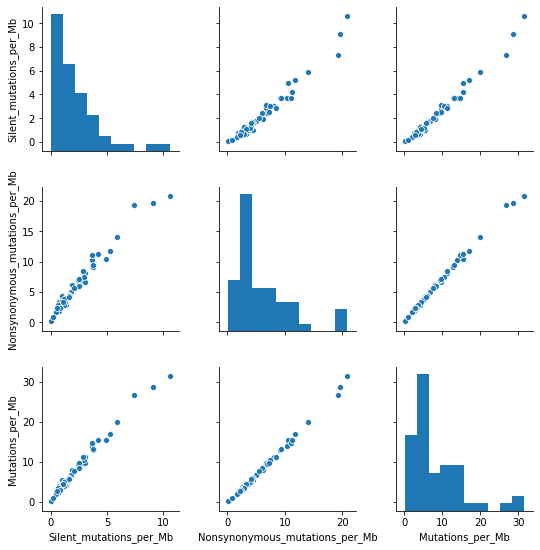

In [29]:
sns.pairplot(tsv_read)


In [30]:
#To link two data sets depending on Tumor_Sample_Barcode column


dff = pd.merge(tsv_read, data, 
                   on='Tumor_Sample_Barcode', 
                   how='outer')

In [31]:
dff.head(1000)

,Patient_ID,Tumor_Sample_Barcode,Matched_Norm_Sample_Barcode_x,Response,Silent_mutations_per_Mb,Nonsynonymous_mutations_per_Mb,Mutations_per_Mb,Hugo_Symbol,Chromosome,Start_position,End_position,Variant_Classification,Variant_Type,Reference_Allele,Tumor_Seq_Allele1,Tumor_Seq_Allele2,Matched_Norm_Sample_Barcode_y,Protein_Change,t_alt_count,t_ref_count
0,Patient-0,Patient-0-Tumor,Patient-0-Normal,Non-Responder,2.87,6.77,9.64,AMOT,X,112035152,112035152,Missense_Mutation,SNP,G,G,C,Patient-0-Normal,p.Q612E,8,31
1,Patient-0,Patient-0-Tumor,Patient-0-Normal,Non-Responder,2.87,6.77,9.64,SEMA6D,15,48062786,48062786,Missense_Mutation,SNP,G,G,A,Patient-0-Normal,p.A676T,4,87
2,Patient-0,Patient-0-Tumor,Patient-0-Normal,Non-Responder,2.87,6.77,9.64,PRR12,19,50100969,50100969,Missense_Mutation,SNP,C,C,G,Patient-0-Normal,p.S1126C,5,25
3,Patient-0,Patient-0-Tumor,Patient-0-Normal,Non-Responder,2.87,6.77,9.64,ZNF253,19,20002885,20002885,Missense_Mutation,SNP,G,G,A,Patient-0-Normal,p.V277I,6,66
4,Patient-0,Patient-0-Tumor,Patient-0-Normal,Non-Responder,2.87,6.77,9.64,MEF2C,5,88025061,88025061,Missense_Mutation,SNP,G,G,A,Patient-0-Normal,p.S313L,6,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Patient-4,Patient-4-Tumor,Patient-4-Normal,Responder,4.93,10.50,15.43,MAPK14,6,36075268,36075268,Nonsense_Mutation,SNP,C,C,G,Patient-4-Normal,p.S293*,29,57
996,Patient-4,Patient-4-Tumor,Patient-4-Normal,Responder,4.93,10.50,15.43,TPTE2,13,20049725,20049725,Missense_Mutation,SNP,G,G,A,Patient-4-Normal,p.S73F,10,21
997,Patient-4,Patient-4-Tumor,Patient-4-Normal,Responder,4.93,10.50,15.43,JUND,19,18392069,18392069,Missense_Mutation,SNP,C,C,T,Patient-4-Normal,p.D76N,5,21
998,Patient-4,Patient-4-Tumor,Patient-4-Normal,Responder,4.93,10.50,15.43,TBC1D1,4,37904032,37904032,Missense_Mutation,SNP,C,C,T,Patient-4-Normal,p.H106Y,25,40


In [32]:
#To save the file as CSV file
#dff.to_csv(r'C:\Users\tmala\Desktop\KAIMRC\df.csv', index = False)

In [33]:
    count = Counter(dff['Hugo_Symbol'])
    # Calling a method of Counter object(count)
    M=count.most_common(15)
M

[('TTN', 41),
 ('TP53', 27),
 ('ERBB4', 27),
 ('MUC16', 22),
 ('SPEN', 22),
 ('KMT2C', 20),
 ('KMT2D', 17),
 ('ERBB3', 16),
 ('FRG1B', 14),
 ('ZNF91', 13),
 ('SYNE1', 12),
 ('DST', 12),
 ('ZNF208', 11),
 ('TYRO3', 11),
 ('FAT4', 10)]

In [34]:
tsv1=dff[dff['Response'] == 'Responder']
tsv1

,Patient_ID,Tumor_Sample_Barcode,Matched_Norm_Sample_Barcode_x,Response,Silent_mutations_per_Mb,Nonsynonymous_mutations_per_Mb,Mutations_per_Mb,Hugo_Symbol,Chromosome,Start_position,End_position,Variant_Classification,Variant_Type,Reference_Allele,Tumor_Seq_Allele1,Tumor_Seq_Allele2,Matched_Norm_Sample_Barcode_y,Protein_Change,t_alt_count,t_ref_count
232,Patient-1,Patient-1-Tumor,Patient-1-Normal,Responder,1.92,6.14,8.06,NBPF10,1,145360584,145360584,Missense_Mutation,SNP,G,G,A,Patient-1-Normal,p.G3070E,7,46
233,Patient-1,Patient-1-Tumor,Patient-1-Normal,Responder,1.92,6.14,8.06,C1orf173,1,75078329,75078329,Missense_Mutation,SNP,C,C,G,Patient-1-Normal,p.E389Q,14,68
234,Patient-1,Patient-1-Tumor,Patient-1-Normal,Responder,1.92,6.14,8.06,LMNB1,5,126145971,126145971,Missense_Mutation,SNP,G,G,A,Patient-1-Normal,p.E248K,23,92
235,Patient-1,Patient-1-Tumor,Patient-1-Normal,Responder,1.92,6.14,8.06,C2orf16,2,27800388,27800388,Nonsense_Mutation,SNP,G,G,T,Patient-1-Normal,p.E317*,35,112
236,Patient-1,Patient-1-Tumor,Patient-1-Normal,Responder,1.92,6.14,8.06,SLCO4C1,5,101631621,101631621,Missense_Mutation,SNP,C,C,G,Patient-1-Normal,p.V116L,9,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11033,Patient-49,Patient-49-Tumor,Patient-49-Normal,Responder,2.04,5.60,7.64,CYP3A7,7,99313469,99313469,Missense_Mutation,SNP,G,G,T,Patient-49-Normal,p.D194E,13,57
11034,Patient-49,Patient-49-Tumor,Patient-49-Normal,Responder,2.04,5.60,7.64,BAIAP2,17,79077885,79077885,Missense_Mutation,SNP,C,C,T,Patient-49-Normal,p.T348I,7,36
11035,Patient-49,Patient-49-Tumor,Patient-49-Normal,Responder,2.04,5.60,7.64,LILRB1,19,55144494,55144494,Missense_Mutation,SNP,C,C,G,Patient-49-Normal,p.S329W,23,36
11036,Patient-49,Patient-49-Tumor,Patient-49-Normal,Responder,2.04,5.60,7.64,TP53,17,7577085,7577085,Nonsense_Mutation,SNP,C,C,A,Patient-49-Normal,p.E285*,8,10


For Responder

In [35]:
tsv1.describe()

,Silent_mutations_per_Mb,Nonsynonymous_mutations_per_Mb,Mutations_per_Mb,Start_position,End_position,t_alt_count,t_ref_count
count,7571.000000,7571.000000,7571.000000,7.571000e+03,7.571000e+03,7571.000000,7571.000000
mean,4.950956,11.775798,16.726778,7.548007e+07,7.548007e+07,21.325849,78.660547
std,2.937168,5.778957,8.665533,5.649832e+07,5.649832e+07,23.626550,77.574027
min,0.440000,1.690000,2.133000,1.260880e+05,1.260880e+05,2.000000,0.000000
25%,2.550000,7.180000,9.730000,3.200045e+07,3.200045e+07,7.000000,31.000000
50%,4.190000,10.500000,15.430000,5.808394e+07,5.808394e+07,14.000000,58.000000
75%,7.350000,19.300000,26.650000,1.132929e+08,1.132929e+08,27.000000,100.000000
max,10.600000,20.800000,31.400000,2.484584e+08,2.484584e+08,503.000000,1240.000000


In [36]:
tsv1.corr()


,Silent_mutations_per_Mb,Nonsynonymous_mutations_per_Mb,Mutations_per_Mb,Start_position,End_position,t_alt_count,t_ref_count
Silent_mutations_per_Mb,1.000000,0.974122,0.988576,-0.026805,-0.026805,-0.059986,-0.135941
Nonsynonymous_mutations_per_Mb,0.974122,1.000000,0.997061,-0.020833,-0.020833,-0.054613,-0.130949
Mutations_per_Mb,0.988576,0.997061,1.000000,-0.022977,-0.022977,-0.056748,-0.133398
Start_position,-0.026805,-0.020833,-0.022977,1.000000,1.000000,0.034164,0.011749
End_position,-0.026805,-0.020833,-0.022977,1.000000,1.000000,0.034164,0.011749
t_alt_count,-0.059986,-0.054613,-0.056748,0.034164,0.034164,1.000000,0.351186
t_ref_count,-0.135941,-0.130949,-0.133398,0.011749,0.011749,0.351186,1.000000


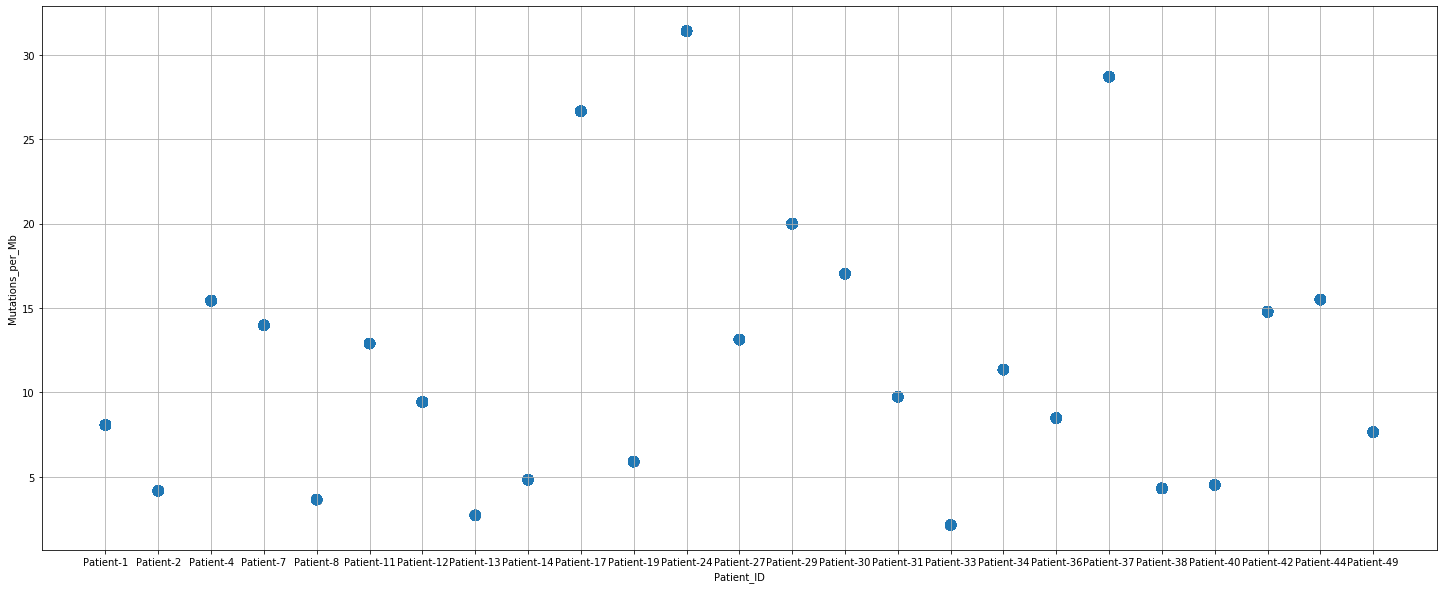

In [37]:
tsv1.plot.scatter(x = 'Patient_ID', y = 'Mutations_per_Mb',figsize=(25, 10), s=(100,100))
plt.grid(True)


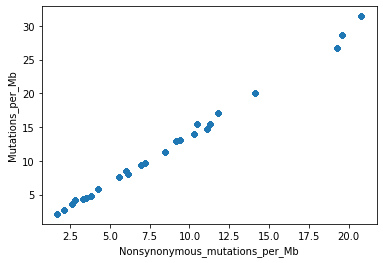

In [38]:
tsv1.plot.scatter(x = 'Nonsynonymous_mutations_per_Mb', y = 'Mutations_per_Mb')


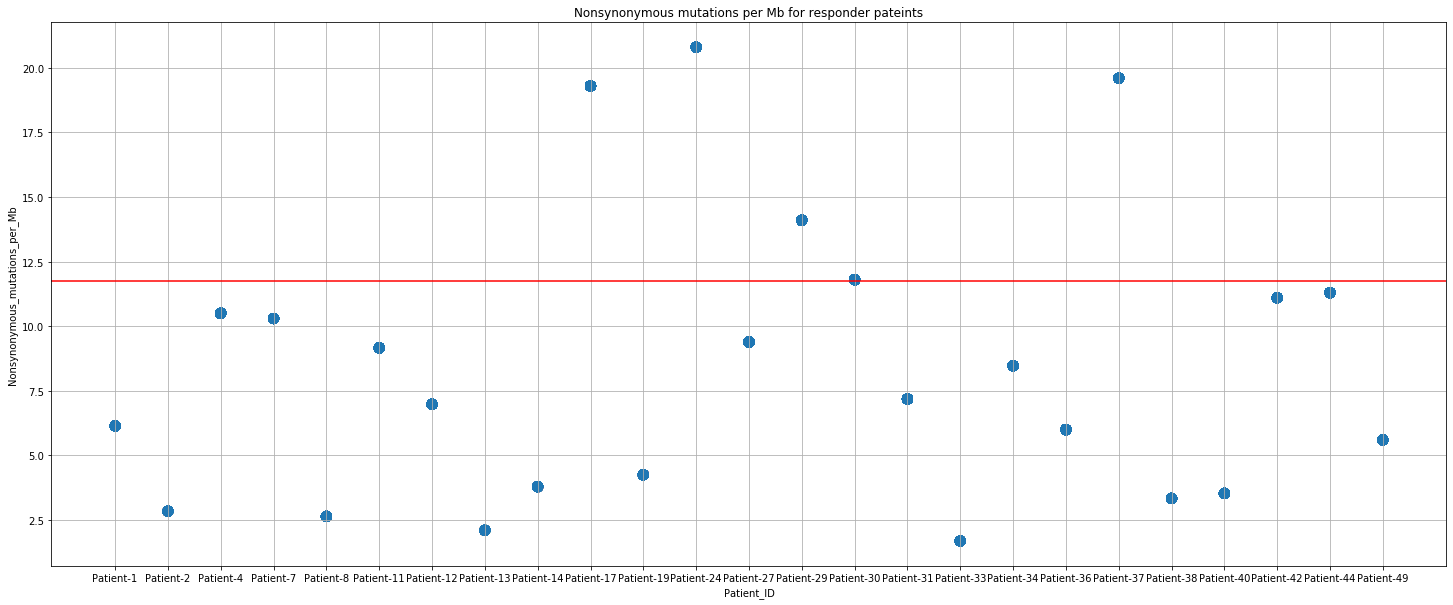

In [39]:
tsv1.plot.scatter(x = 'Patient_ID', y = 'Nonsynonymous_mutations_per_Mb',figsize=(25, 10), s=(100,100))
plt.title('Nonsynonymous mutations per Mb for responder pateints')
plt.axhline(y = 11.77, color = 'r', linestyle = '-')

plt.grid(True)


In [40]:
tsv2=dff[dff['Response'] == 'Non-Responder']
tsv2

,Patient_ID,Tumor_Sample_Barcode,Matched_Norm_Sample_Barcode_x,Response,Silent_mutations_per_Mb,Nonsynonymous_mutations_per_Mb,Mutations_per_Mb,Hugo_Symbol,Chromosome,Start_position,End_position,Variant_Classification,Variant_Type,Reference_Allele,Tumor_Seq_Allele1,Tumor_Seq_Allele2,Matched_Norm_Sample_Barcode_y,Protein_Change,t_alt_count,t_ref_count
0,Patient-0,Patient-0-Tumor,Patient-0-Normal,Non-Responder,2.87,6.77,9.640,AMOT,X,112035152,112035152,Missense_Mutation,SNP,G,G,C,Patient-0-Normal,p.Q612E,8,31
1,Patient-0,Patient-0-Tumor,Patient-0-Normal,Non-Responder,2.87,6.77,9.640,SEMA6D,15,48062786,48062786,Missense_Mutation,SNP,G,G,A,Patient-0-Normal,p.A676T,4,87
2,Patient-0,Patient-0-Tumor,Patient-0-Normal,Non-Responder,2.87,6.77,9.640,PRR12,19,50100969,50100969,Missense_Mutation,SNP,C,C,G,Patient-0-Normal,p.S1126C,5,25
3,Patient-0,Patient-0-Tumor,Patient-0-Normal,Non-Responder,2.87,6.77,9.640,ZNF253,19,20002885,20002885,Missense_Mutation,SNP,G,G,A,Patient-0-Normal,p.V277I,6,66
4,Patient-0,Patient-0-Tumor,Patient-0-Normal,Non-Responder,2.87,6.77,9.640,MEF2C,5,88025061,88025061,Missense_Mutation,SNP,G,G,A,Patient-0-Normal,p.S313L,6,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10841,Patient-48,Patient-48-Tumor,Patient-48-Normal,Non-Responder,0.55,2.27,2.815,FATE1,X,150885748,150885748,Missense_Mutation,SNP,G,G,C,Patient-48-Normal,p.M37I,5,295
10842,Patient-48,Patient-48-Tumor,Patient-48-Normal,Non-Responder,0.55,2.27,2.815,BIRC2,11,102220686,102220686,Missense_Mutation,SNP,G,G,C,Patient-48-Normal,p.S34T,8,172
10843,Patient-48,Patient-48-Tumor,Patient-48-Normal,Non-Responder,0.55,2.27,2.815,KMT2D,12,49432236,49432236,Missense_Mutation,SNP,G,G,A,Patient-48-Normal,p.P2968L,13,168
10844,Patient-48,Patient-48-Tumor,Patient-48-Normal,Non-Responder,0.55,2.27,2.815,TYRO3,15,41870271,41870271,Missense_Mutation,SNP,A,A,G,Patient-48-Normal,p.R824G,6,48


For Non-Responder

In [41]:
tsv2.describe()

,Silent_mutations_per_Mb,Nonsynonymous_mutations_per_Mb,Mutations_per_Mb,Start_position,End_position,t_alt_count,t_ref_count
count,3467.000000,3467.000000,3467.000000,3.467000e+03,3.467000e+03,3467.000000,3467.000000
mean,1.617690,4.490323,6.107451,7.785116e+07,7.785116e+07,16.120565,111.772714
std,0.935177,2.007128,2.919252,5.883440e+07,5.883440e+07,17.973707,103.681958
min,0.030000,0.120000,0.152500,9.616000e+03,9.616000e+03,2.000000,0.000000
25%,0.720000,2.870000,4.027000,3.160414e+07,3.160414e+07,5.000000,46.000000
50%,1.290000,4.140000,5.390000,5.956082e+07,5.956082e+07,10.000000,86.000000
75%,2.870000,6.690000,9.640000,1.188921e+08,1.188921e+08,20.000000,146.000000
max,3.070000,8.150000,11.160000,2.491501e+08,2.491501e+08,293.000000,1383.000000


In [42]:
tsv2.corr()


,Silent_mutations_per_Mb,Nonsynonymous_mutations_per_Mb,Mutations_per_Mb,Start_position,End_position,t_alt_count,t_ref_count
Silent_mutations_per_Mb,1.000000,0.963112,0.982757,-0.024932,-0.024932,-0.085064,-0.057525
Nonsynonymous_mutations_per_Mb,0.963112,1.000000,0.996262,-0.015935,-0.015935,-0.079741,-0.024954
Mutations_per_Mb,0.982757,0.996262,1.000000,-0.018942,-0.018942,-0.082113,-0.035624
Start_position,-0.024932,-0.015935,-0.018942,1.000000,1.000000,0.039193,0.010742
End_position,-0.024932,-0.015935,-0.018942,1.000000,1.000000,0.039193,0.010742
t_alt_count,-0.085064,-0.079741,-0.082113,0.039193,0.039193,1.000000,0.184539
t_ref_count,-0.057525,-0.024954,-0.035624,0.010742,0.010742,0.184539,1.000000


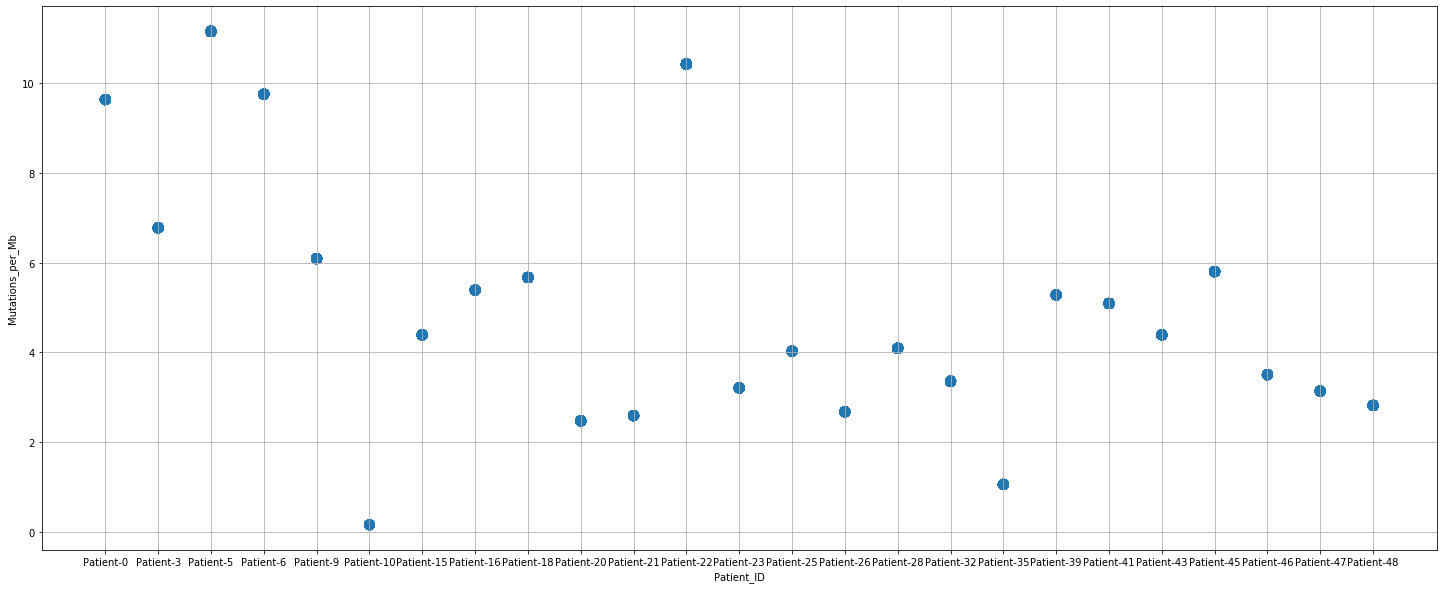

In [43]:
tsv2.plot.scatter(x = 'Patient_ID', y = 'Mutations_per_Mb',figsize=(25, 10), s=(100,100))
plt.grid(True)


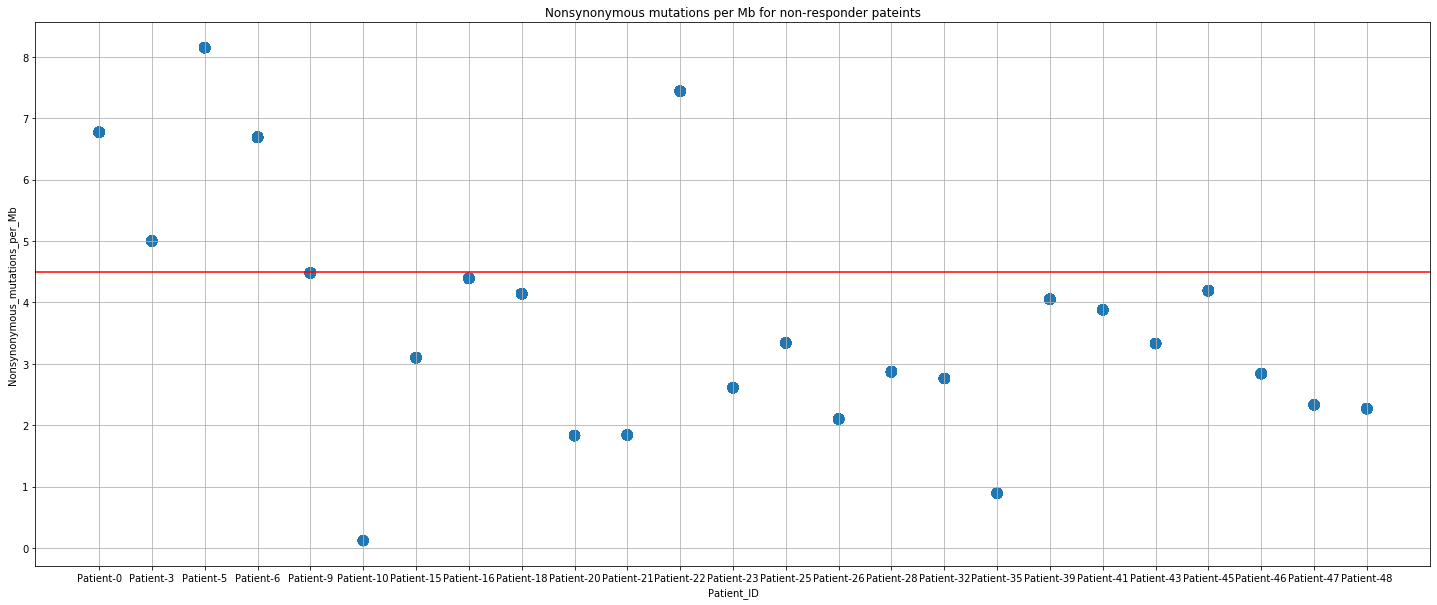

In [44]:
tsv2.plot.scatter(x = 'Patient_ID', y = 'Nonsynonymous_mutations_per_Mb',figsize=(25, 10), s=(100,100))
plt.title('Nonsynonymous mutations per Mb for non-responder pateints')
plt.axhline(y = 4.49, color = 'r', linestyle = '-')

plt.grid(True)


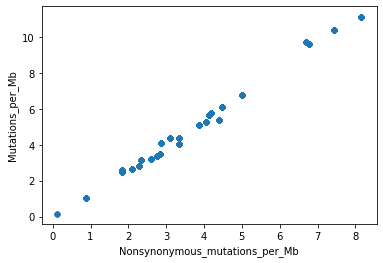

In [45]:
tsv2.plot.scatter(x = 'Nonsynonymous_mutations_per_Mb', y = 'Mutations_per_Mb')


In [46]:
dff['Tumor_Seq_Allele1'].value_counts()


G    4889
C    4715
A     751
T     683
Name: Tumor_Seq_Allele1, dtype: int64

In [47]:
dff['Tumor_Seq_Allele2'].value_counts()


A    3498
T    3362
C    2110
G    2068
Name: Tumor_Seq_Allele2, dtype: int64

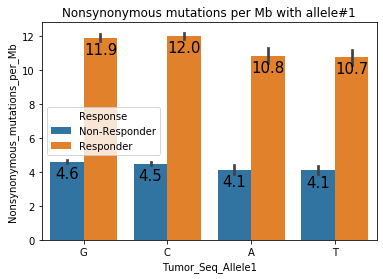

In [48]:
splot1=sns.barplot(x="Tumor_Seq_Allele1", y="Nonsynonymous_mutations_per_Mb", hue="Response", data=dff)
for p in splot1.patches:
    splot1.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, -12), 
                   textcoords = 'offset points')

    plt.title("Nonsynonymous mutations per Mb with allele#1", size=12)


Text(0.5, 1.0, 'Nonsynonymous mutations per Mb with allele#2')

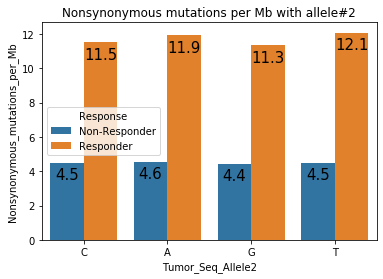

In [49]:
splot2=sns.barplot(x="Tumor_Seq_Allele2", y="Nonsynonymous_mutations_per_Mb", hue="Response", data=dff,ci = 0)
for p in splot2.patches:
    splot2.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, -12), 
                   textcoords = 'offset points')
    
    
plt.title("Nonsynonymous mutations per Mb with allele#2", size=12)

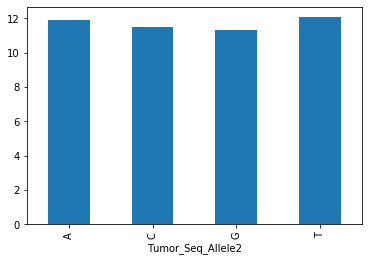

In [50]:
tsv1.groupby('Tumor_Seq_Allele2')['Nonsynonymous_mutations_per_Mb'].mean().plot.bar()


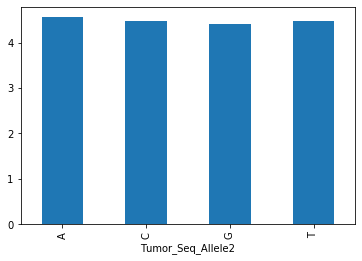

In [51]:
tsv2.groupby('Tumor_Seq_Allele2')['Nonsynonymous_mutations_per_Mb'].mean().plot.bar()


In [52]:
tsv1.groupby(['Hugo_Symbol', 'Protein_Change']).size().reset_index(name='counts')


,Hugo_Symbol,Protein_Change,counts
0,A2ML1,p.S799*,1
1,AADAC,p.V139I,1
2,AADACL4,p.R264H,1
3,AADAT,p.S260F,1
4,AAK1,p.S902*,1
...,...,...,...
7526,ZZEF1,p.A2419T,1
7527,ZZEF1,p.L2333P,1
7528,ZZEF1,p.L402V,1
7529,ZZEF1,p.Q1763H,1


In [53]:
#to find the t-test

a = dff.loc[dff['Response'] == 'Responder', 'Nonsynonymous_mutations_per_Mb'].to_numpy()
b = dff.loc[dff['Response'] == 'Non-Responder', 'Nonsynonymous_mutations_per_Mb'].to_numpy()
st.ttest_ind(a=a, b=b, equal_var=True)


Ttest_indResult(statistic=72.26048488263244, pvalue=0.0)

In [54]:

rp.ttest(group1= dff['Nonsynonymous_mutations_per_Mb'][dff['Response'] == 'Responder'], group1_name= "Responder",
         group2= dff['Nonsynonymous_mutations_per_Mb'][dff['Response'] == 'Non-Responder'], group2_name= "Non-Responder")


(        Variable        N       Mean        SD        SE  95% Conf.   Interval
 0      Responder   7571.0  11.775798  5.778957  0.066416  11.645605  11.905992
 1  Non-Responder   3467.0   4.490323  2.007128  0.034088   4.423489   4.557157
 2       combined  11038.0   9.487454  5.967161  0.056797   9.376123   9.598786,
                           Independent t-test     results
 0  Difference (Responder - Non-Responder) =       7.2855
 1                      Degrees of freedom =   11036.0000
 2                                       t =      72.2605
 3                   Two side test p value =       0.0000
 4                  Difference < 0 p value =       1.0000
 5                  Difference > 0 p value =       0.0000
 6                               Cohen's d =       1.4818
 7                               Hedge's g =       1.4817
 8                           Glass's delta =       1.2607
 9                             Pearson's r =       0.5667)

In [55]:
summary, results = rp.ttest(group1= dff['Nonsynonymous_mutations_per_Mb'][dff['Response'] == 'Responder'], group1_name= "Responder",
                            group2= dff['Nonsynonymous_mutations_per_Mb'][dff['Response'] == 'Non-Responder'], group2_name= "Non-Responder")
summary

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Responder,7571.0,11.775798,5.778957,0.066416,11.645605,11.905992
1,Non-Responder,3467.0,4.490323,2.007128,0.034088,4.423489,4.557157
2,combined,11038.0,9.487454,5.967161,0.056797,9.376123,9.598786


In [56]:
g=dff.groupby(['Hugo_Symbol','Variant_Classification','Patient_ID'])
g

In [57]:
#To find mutation genes

mutant = dff[dff[['Hugo_Symbol','Patient_ID', 'Variant_Classification']].duplicated() == True]
mutant

,Patient_ID,Tumor_Sample_Barcode,Matched_Norm_Sample_Barcode_x,Response,Silent_mutations_per_Mb,Nonsynonymous_mutations_per_Mb,Mutations_per_Mb,Hugo_Symbol,Chromosome,Start_position,End_position,Variant_Classification,Variant_Type,Reference_Allele,Tumor_Seq_Allele1,Tumor_Seq_Allele2,Matched_Norm_Sample_Barcode_y,Protein_Change,t_alt_count,t_ref_count
93,Patient-0,Patient-0-Tumor,Patient-0-Normal,Non-Responder,2.87,6.77,9.64,SYNE1,6,152783941,152783941,Missense_Mutation,SNP,G,G,A,Patient-0-Normal,p.H728Y,6,43
118,Patient-0,Patient-0-Tumor,Patient-0-Normal,Non-Responder,2.87,6.77,9.64,ZNF716,7,57529048,57529048,Missense_Mutation,SNP,A,A,G,Patient-0-Normal,p.K294R,3,24
141,Patient-0,Patient-0-Tumor,Patient-0-Normal,Non-Responder,2.87,6.77,9.64,ZNF721,4,436647,436647,Missense_Mutation,SNP,C,C,T,Patient-0-Normal,p.A525T,5,97
179,Patient-0,Patient-0-Tumor,Patient-0-Normal,Non-Responder,2.87,6.77,9.64,TTN,2,179517418,179517418,Missense_Mutation,SNP,G,G,A,Patient-0-Normal,p.S13002L,5,191
180,Patient-0,Patient-0-Tumor,Patient-0-Normal,Non-Responder,2.87,6.77,9.64,MVP,16,29851532,29851532,Missense_Mutation,SNP,C,C,G,Patient-0-Normal,p.Q315E,39,191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10927,Patient-49,Patient-49-Tumor,Patient-49-Normal,Responder,2.04,5.60,7.64,RAD50,5,131930725,131930725,Missense_Mutation,SNP,C,C,T,Patient-49-Normal,p.S514L,4,40
10960,Patient-49,Patient-49-Tumor,Patient-49-Normal,Responder,2.04,5.60,7.64,TMEM168,7,112407665,112407665,Missense_Mutation,SNP,C,C,G,Patient-49-Normal,p.D561H,13,59
10971,Patient-49,Patient-49-Tumor,Patient-49-Normal,Responder,2.04,5.60,7.64,KNDC1,10,135038337,135038337,Missense_Mutation,SNP,G,G,C,Patient-49-Normal,p.E1731D,4,46
10991,Patient-49,Patient-49-Tumor,Patient-49-Normal,Responder,2.04,5.60,7.64,EPB41L5,2,120831747,120831747,Missense_Mutation,SNP,C,C,A,Patient-49-Normal,p.L134I,3,11


In [58]:
#Mutation genes
m=mutant.Hugo_Symbol.tolist()
m

['SYNE1',
 'ZNF716',
 'ZNF721',
 'TTN',
 'MVP',
 'TTN',
 'MSLNL',
 'MVP',
 'ACIN1',
 'ACIN1',
 'ACIN1',
 'PDCD11',
 'ACIN1',
 'VPS13D',
 'MYCBP2',
 'LRRK2',
 'HSPG2',
 'DNAJC6',
 'DST',
 'ITPR1',
 'SPESP1',
 'SPESP1',
 'PDSS1',
 'FCRL2',
 'F5',
 'ZNF626',
 'ZNF626',
 'ZNF626',
 'ZBTB1',
 'ARFGAP2',
 'OR5A1',
 'DNM2',
 'TTN',
 'MUC7',
 'CHKB',
 'TRIM8',
 'IRS1',
 'IRS1',
 'ZNF700',
 'XIRP2',
 'MYH1',
 'XIRP2',
 'ZNF737',
 'TTN',
 'IRF2BPL',
 'ZNF430',
 'SYNE1',
 'ZNF90',
 'ZBTB33',
 'ZNF716',
 'ZNF737',
 'ZNF708',
 'ZNF626',
 'CDK5RAP1',
 'ZNF253',
 'ZNF714',
 'ZNF479',
 'ZNF716',
 'CAPS2',
 'C17orf70',
 'ZNF680',
 'KIF24',
 'DNAH2',
 'SPEN',
 'SPTAN1',
 'ZNF430',
 'ZNF675',
 'DMXL1',
 'ZNF708',
 'PLEC',
 'CA10',
 'DAB1',
 'ZNF714',
 'ZNF90',
 'ZNF91',
 'ZNF430',
 'CHD6',
 'CCDC15',
 'ZNF430',
 'ZNF91',
 'CTD-3074O7.11',
 'NBPF14',
 'ITGAL',
 'OSCP1',
 'PSD3',
 'SYT17',
 'PSD3',
 'TCEAL4',
 'SYT17',
 'ANKRD36C',
 'CTD-3074O7.11',
 'KIAA0947',
 'TCEAL4',
 'ANKRD36C',
 'PCDHAC1',
 'MDN1',

In [59]:
len(m)
c = Counter(m)
c.most_common(5)

[('SPEN', 16), ('TTN', 12), ('KMT2C', 12), ('ERBB4', 9), ('KRT4', 7)]

In [60]:
#the numbers of mutations samples
mnew = np.unique(m).tolist()
len(mnew)

372

In [61]:
#mutant.plot.scatter(x = 'Hugo_Symbol', y = 'Nonsynonymous_mutations_per_Mb',figsize=(25, 10), s=(100,100))


In [62]:
wild = dff[dff[['Hugo_Symbol','Patient_ID', 'Variant_Classification']].duplicated() == False]
wild

,Patient_ID,Tumor_Sample_Barcode,Matched_Norm_Sample_Barcode_x,Response,Silent_mutations_per_Mb,Nonsynonymous_mutations_per_Mb,Mutations_per_Mb,Hugo_Symbol,Chromosome,Start_position,End_position,Variant_Classification,Variant_Type,Reference_Allele,Tumor_Seq_Allele1,Tumor_Seq_Allele2,Matched_Norm_Sample_Barcode_y,Protein_Change,t_alt_count,t_ref_count
0,Patient-0,Patient-0-Tumor,Patient-0-Normal,Non-Responder,2.87,6.77,9.64,AMOT,X,112035152,112035152,Missense_Mutation,SNP,G,G,C,Patient-0-Normal,p.Q612E,8,31
1,Patient-0,Patient-0-Tumor,Patient-0-Normal,Non-Responder,2.87,6.77,9.64,SEMA6D,15,48062786,48062786,Missense_Mutation,SNP,G,G,A,Patient-0-Normal,p.A676T,4,87
2,Patient-0,Patient-0-Tumor,Patient-0-Normal,Non-Responder,2.87,6.77,9.64,PRR12,19,50100969,50100969,Missense_Mutation,SNP,C,C,G,Patient-0-Normal,p.S1126C,5,25
3,Patient-0,Patient-0-Tumor,Patient-0-Normal,Non-Responder,2.87,6.77,9.64,ZNF253,19,20002885,20002885,Missense_Mutation,SNP,G,G,A,Patient-0-Normal,p.V277I,6,66
4,Patient-0,Patient-0-Tumor,Patient-0-Normal,Non-Responder,2.87,6.77,9.64,MEF2C,5,88025061,88025061,Missense_Mutation,SNP,G,G,A,Patient-0-Normal,p.S313L,6,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11033,Patient-49,Patient-49-Tumor,Patient-49-Normal,Responder,2.04,5.60,7.64,CYP3A7,7,99313469,99313469,Missense_Mutation,SNP,G,G,T,Patient-49-Normal,p.D194E,13,57
11034,Patient-49,Patient-49-Tumor,Patient-49-Normal,Responder,2.04,5.60,7.64,BAIAP2,17,79077885,79077885,Missense_Mutation,SNP,C,C,T,Patient-49-Normal,p.T348I,7,36
11035,Patient-49,Patient-49-Tumor,Patient-49-Normal,Responder,2.04,5.60,7.64,LILRB1,19,55144494,55144494,Missense_Mutation,SNP,C,C,G,Patient-49-Normal,p.S329W,23,36
11036,Patient-49,Patient-49-Tumor,Patient-49-Normal,Responder,2.04,5.60,7.64,TP53,17,7577085,7577085,Nonsense_Mutation,SNP,C,C,A,Patient-49-Normal,p.E285*,8,10


In [63]:
#wild genes

w=wild.Hugo_Symbol.tolist()
w

['AMOT',
 'SEMA6D',
 'PRR12',
 'ZNF253',
 'MEF2C',
 'TTN',
 'ZDHHC1',
 'NCEH1',
 'DEFB129',
 'CALD1',
 'FANCM',
 'BCL9',
 'TTN',
 'GTF3C1',
 'PLEC',
 'INSL5',
 'NUDT16',
 'EMC3',
 'NRK',
 'KCNC3',
 'FOXD4L1',
 'EXOC1',
 'ZNF878',
 'TCTN3',
 'PCDHGB2',
 'ABCC8',
 'NRN1L',
 'DZIP1',
 'XIRP1',
 'OR1F1',
 'GPR1',
 'C4orf33',
 'ALOX5',
 'OR4P4',
 'FLNC',
 'HMCN1',
 'EXOC4',
 'MUC16',
 'SGCG',
 'KMT2D',
 'FADD',
 'RPS6KB2',
 'GTPBP8',
 'PHLPP2',
 'CCDC108',
 'FOXA1',
 'PRSS12',
 'GIMAP8',
 'NDUFAF5',
 'TNKS',
 'ST14',
 'UNC5C',
 'STUB1',
 'SYNE1',
 'ZNF716',
 'TCF3',
 'KIAA1244',
 'NCAM2',
 'TRIB3',
 'PIK3CG',
 'ZSWIM3',
 'MVP',
 'TNPO2',
 'PCDHGB4',
 'ASTN1',
 'ZSCAN29',
 'FTMT',
 'HIST1H3F',
 'DST',
 'DYNC1H1',
 'LRP11',
 'SDK2',
 'SACS',
 'RUFY1',
 'HSD17B4',
 'KIAA0754',
 'WDHD1',
 'DST',
 'FLG2',
 'TSNARE1',
 'PTCD1',
 'C1QTNF2',
 'CALML3',
 'ANKRD30A',
 'SLC12A6',
 'TOMM20L',
 'LAMA1',
 'HIP1',
 'COL7A1',
 'ZNF649',
 'ZNF286B',
 'DNAH7',
 'AKAP6',
 'OR14C36',
 'ZNF93',
 'OR10H5',
 'FOX

In [64]:
w = dff['Hugo_Symbol'].duplicated(keep = False)

w

0         True
1         True
2        False
3         True
4        False
         ...  
11033    False
11034    False
11035     True
11036     True
11037     True
Name: Hugo_Symbol, Length: 11038, dtype: bool

In [65]:
dff = dff[~w]
dff

,Patient_ID,Tumor_Sample_Barcode,Matched_Norm_Sample_Barcode_x,Response,Silent_mutations_per_Mb,Nonsynonymous_mutations_per_Mb,Mutations_per_Mb,Hugo_Symbol,Chromosome,Start_position,End_position,Variant_Classification,Variant_Type,Reference_Allele,Tumor_Seq_Allele1,Tumor_Seq_Allele2,Matched_Norm_Sample_Barcode_y,Protein_Change,t_alt_count,t_ref_count
2,Patient-0,Patient-0-Tumor,Patient-0-Normal,Non-Responder,2.87,6.77,9.64,PRR12,19,50100969,50100969,Missense_Mutation,SNP,C,C,G,Patient-0-Normal,p.S1126C,5,25
4,Patient-0,Patient-0-Tumor,Patient-0-Normal,Non-Responder,2.87,6.77,9.64,MEF2C,5,88025061,88025061,Missense_Mutation,SNP,G,G,A,Patient-0-Normal,p.S313L,6,42
6,Patient-0,Patient-0-Tumor,Patient-0-Normal,Non-Responder,2.87,6.77,9.64,ZDHHC1,16,67429102,67429102,Missense_Mutation,SNP,C,C,T,Patient-0-Normal,p.D345N,12,31
7,Patient-0,Patient-0-Tumor,Patient-0-Normal,Non-Responder,2.87,6.77,9.64,NCEH1,3,172428857,172428857,Missense_Mutation,SNP,C,C,T,Patient-0-Normal,p.R5H,13,70
8,Patient-0,Patient-0-Tumor,Patient-0-Normal,Non-Responder,2.87,6.77,9.64,DEFB129,20,210318,210318,Missense_Mutation,SNP,G,G,C,Patient-0-Normal,p.R153T,7,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11020,Patient-49,Patient-49-Tumor,Patient-49-Normal,Responder,2.04,5.60,7.64,GOLGA6L2,15,23690534,23690534,Missense_Mutation,SNP,C,C,A,Patient-49-Normal,p.D46Y,3,10
11022,Patient-49,Patient-49-Tumor,Patient-49-Normal,Responder,2.04,5.60,7.64,GPIHBP1,8,144295188,144295188,Missense_Mutation,SNP,C,C,T,Patient-49-Normal,p.R16W,6,14
11026,Patient-49,Patient-49-Tumor,Patient-49-Normal,Responder,2.04,5.60,7.64,RBM24,6,17292294,17292294,Missense_Mutation,SNP,G,G,A,Patient-49-Normal,p.A219T,3,21
11033,Patient-49,Patient-49-Tumor,Patient-49-Normal,Responder,2.04,5.60,7.64,CYP3A7,7,99313469,99313469,Missense_Mutation,SNP,G,G,T,Patient-49-Normal,p.D194E,13,57


In [66]:
n=dff.Hugo_Symbol.tolist()
len(n)
c1 = Counter(n)
c1.most_common(5)

[('PRR12', 1), ('MEF2C', 1), ('ZDHHC1', 1), ('NCEH1', 1), ('DEFB129', 1)]

In [67]:
#the numbers of wild samples

wnew = np.unique(n).tolist()
len(wnew)

4483

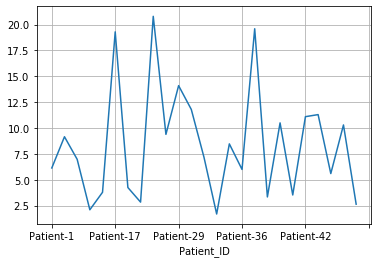

In [68]:
avg_temp = tsv1.groupby('Patient_ID')['Nonsynonymous_mutations_per_Mb'].agg('mean')
avg_temp.plot()
plt.grid(True)

plt.show()

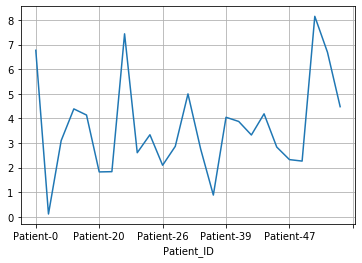

In [69]:
avg_temp = tsv2.groupby('Patient_ID')['Nonsynonymous_mutations_per_Mb'].agg('mean')
avg_temp.plot()
plt.grid(True)

plt.show()